In [102]:
from __future__ import  division
%matplotlib inline
from data_tools import draw_all_datasets, draw_bar_chart
from data_tools import get_dict_from_file, get_names_from_files
import itertools
import pandas as pd
import numpy as np

In [117]:
# because I don't have number of appearances of individual labels in lsvrc_bb, I exclude it from the analysis
PATH = "datasets/"
dataset_filenames = {
    "coco":PATH+"coco.txt", 
    "voc":PATH+"pascal_voc.txt", 
    "voc_contex":PATH+"pascal_voc_context.txt", 
    "cocostuff":PATH+"cocostuff.txt",
    "citiscapes":PATH+"citiscraper.txt",
    "ade20k":PATH+"ade20k.txt"
}
total_number_of_pictures = {
    "coco":82783, 
    "voc":2913, 
    "voc_contex": 10103, 
    "cocostuff":82783,
    "citiscapes":5000,
    "ade20k": 22210
}

In [118]:
draw_all_datasets(dataset_filenames)

In [119]:
all_objects = {}
for name in dataset_filenames.keys():
    filename = dataset_filenames[name]
    all_objects[name]=get_dict_from_file(filename)
    
all_objects_df = pd.DataFrame(all_objects)
all_objects_df.fillna(0, inplace=True)

In [120]:
total_number_labels = {}
total_number_appearance = {}
for name in dataset_filenames.keys():
    total_number_labels[name] = len(all_objects[name].keys())
    total_number_appearance[name] = sum(all_objects[name].values())


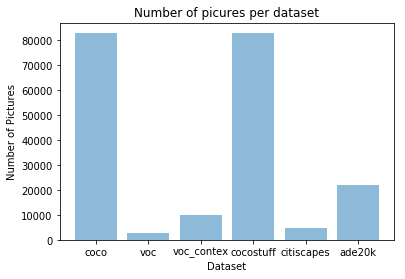

In [121]:
draw_bar_chart(total_number_labels.keys(), total_number_of_pictures.values(), "Number of Pictures", "Dataset", "Number of picures per dataset")

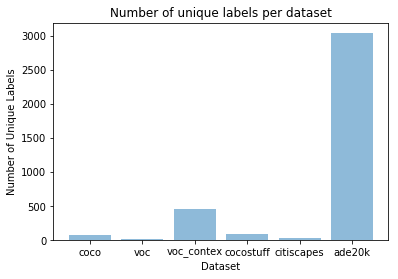

In [122]:
draw_bar_chart(total_number_labels.keys(), total_number_labels.values(), "Number of Unique Labels", "Dataset", "Number of unique labels per dataset")

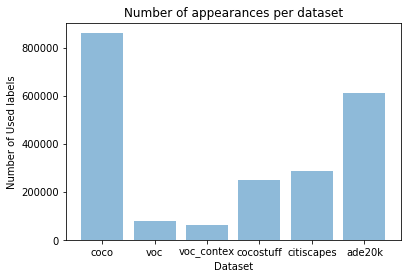

In [123]:
draw_bar_chart(total_number_labels.keys(), total_number_appearance.values(), "Number of Used labels", "Dataset", "Number of appearances per dataset")

In [124]:
matrix = pd.DataFrame(columns=dataset_filenames.keys(), index=dataset_filenames.keys())
for d1 in all_objects.keys():
    for d2 in all_objects.keys():
        matrix[d1][d2] = len(set(get_names_from_files(dataset_filenames[d1])).intersection(set(get_names_from_files(dataset_filenames[d2]))))
print("Intresection between datasets")

matrix

Intresection between datasets


,coco,voc,voc_contex,cocostuff,citiscapes,ade20k
coco,80,14,41,0,8,59
voc,14,20,19,0,5,16
voc_contex,41,19,460,33,15,326
cocostuff,0,0,33,92,3,52
citiscapes,8,5,15,3,40,23
ade20k,59,16,326,52,23,3040


The matrix above shows the intersection among datasets. TODO: how many images per one intersection.

I would suggest using voc_context, coco, cocostuff and part of ade20k. 
Coco and cocostuff may be used as exclusive datasets.
Voc and Voc_context as subset one of the other.
Voc_context has a large intersection with coco, ade20k, cocostuff.
Ade20K and Voc_context intresects 326/460(for voc_context) labels. 

In [125]:
class_names = []
for d1 in all_objects.keys():
    class_names.extend(all_objects[d1].keys())
class_names = set(class_names)

# Summaries so far:
### Total number of uniquie labels through all 6 datasets: 3249
### Total number of pictures: 205792
### Total number of occurrence: 2 156 273


Now I examine in how many datasets are out labels. Only labels in more datasets are worth further examination and visualization.

In [126]:
# this prints histogram. Most labels are only in 1 dataset
# the .astype(bool) casting does the trick, zeros are false, everything nonzero is true, so I can sum it
all_objects_df.astype(bool).sum(axis=1).value_counts()

1    2871
2     272
3      62
0      26
4      13
5       5
dtype: int64

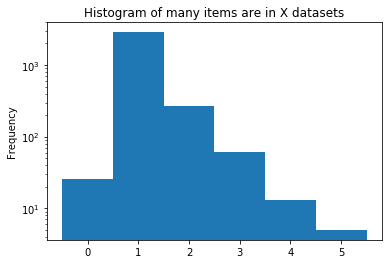

In [127]:
all_objects_df.astype(bool).sum(axis=1).plot(kind='hist', bins=np.arange(7)-0.5, log=True, title='Histogram of many items are in X datasets')

In [138]:
print('Only {} labels are in more than 1 dataset'.format((all_objects_df.astype(bool).sum(axis=1) > 1).sum()))
print('Only {} labels are not in any dataset'.format((all_objects_df.astype(bool).sum(axis=1) == 0).sum()))

Only 352 labels are in more than 1 dataset
Only 26 labels are not in any dataset


In [145]:
# list of labels not being in any dataset, some weird shit is going on here
all_objects_df[all_objects_df.astype(bool).sum(axis=1) == 0]

,ade20k,citiscapes,coco,cocostuff,voc,voc_contex
camera lens,0.0,0.0,0.0,0.0,0.0,0.0
clothes tree,0.0,0.0,0.0,0.0,0.0,0.0
control booth,0.0,0.0,0.0,0.0,0.0,0.0
copying machine,0.0,0.0,0.0,0.0,0.0,0.0
drop,0.0,0.0,0.0,0.0,0.0,0.0
electronic keyboard,0.0,0.0,0.0,0.0,0.0,0.0
forceps,0.0,0.0,0.0,0.0,0.0,0.0
fox,0.0,0.0,0.0,0.0,0.0,0.0
gas hood,0.0,0.0,0.0,0.0,0.0,0.0
gas stove,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
dataset_filenames.keys()

dict_keys(['coco', 'voc', 'voc_contex', 'cocostuff', 'citiscapes', 'ade20k'])

In [149]:
# checking if all 0 times appereance are in voc_contex
for label in all_objects_df[all_objects_df.astype(bool).sum(axis=1) == 0].index:
    print(label in all_objects['voc_contex'])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


## Now, making pies

#### for labels in all 5 datasets

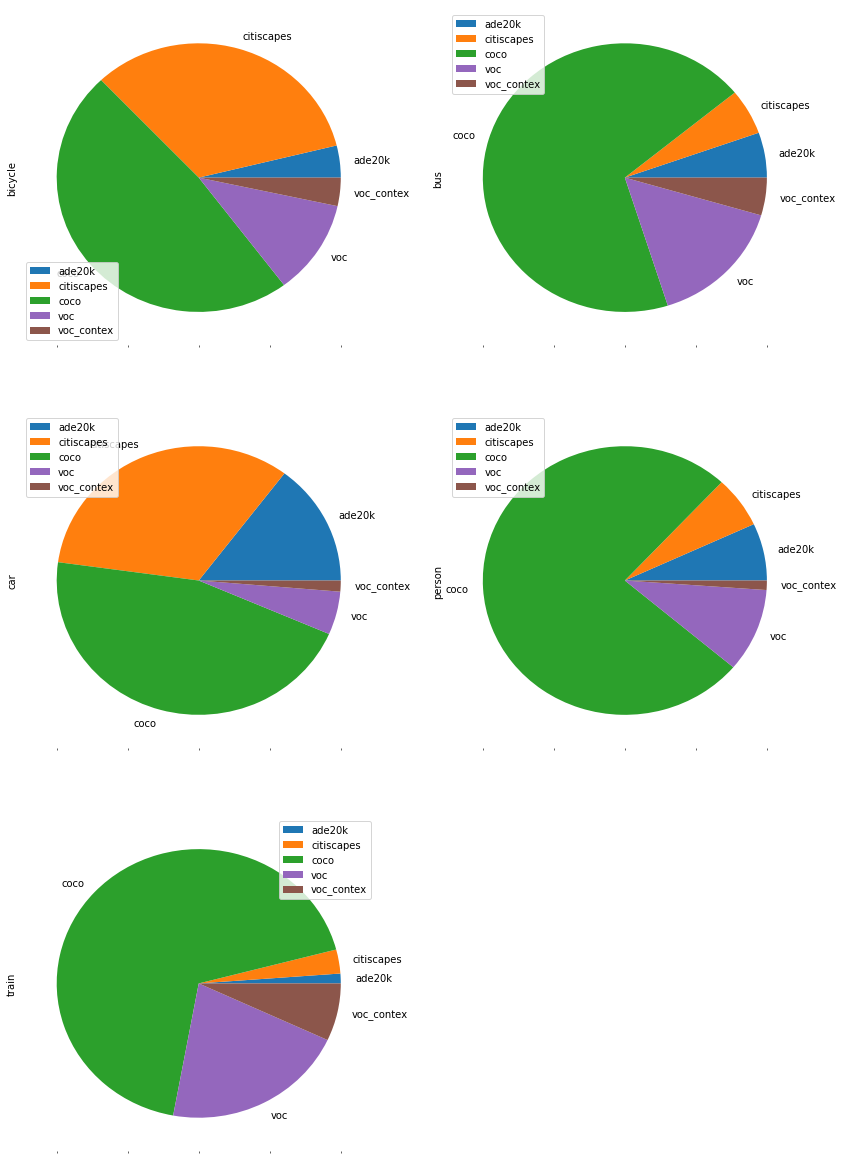

In [170]:
# there is 5 of them
in_5_datasets = all_objects_df[all_objects_df.astype(bool).sum(axis=1) == 5]
in_5_datasets.T.plot.pie(subplots=True, figsize=(14, 21), layout=(3, 2))
print()

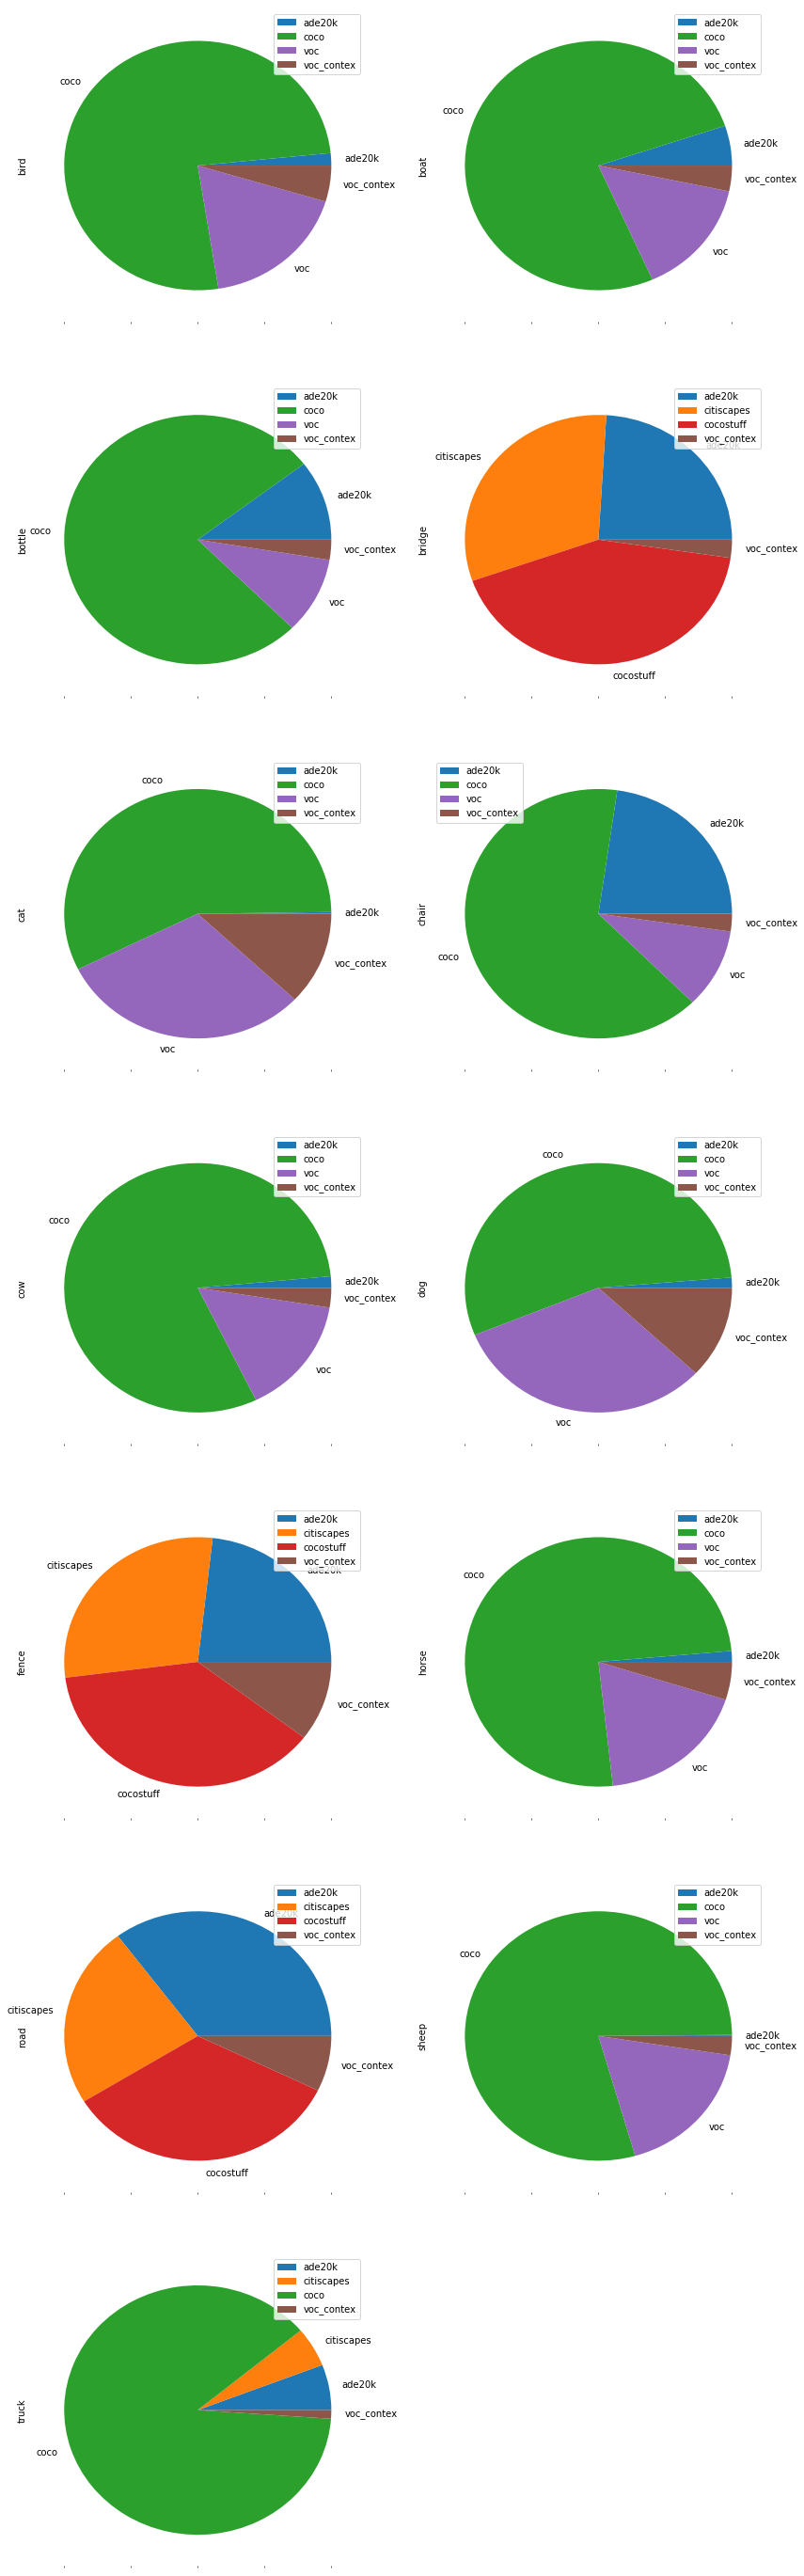

In [174]:
# there is 13 of them
in_4_datasets = all_objects_df[all_objects_df.astype(bool).sum(axis=1) == 4]
in_4_datasets.T.plot.pie(subplots=True, figsize=(14, 50), layout=(7, 2))
print()